# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [192]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
# Your Code Here

#Configuracion de los graficos.
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [204]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
ft = fitbit.copy()
ft

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [205]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [206]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
plot1 = pd.DataFrame(ft['Steps'].groupby(ft['Months_encoded']).mean())
plot1

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


In [218]:
columnas = list(ft.columns)


In [226]:
newcol = {columna: columna.replace(" ", "_").lower() for columna in columnas}

dict_values(['date', 'calorie_burned', 'steps', 'distance', 'floors', 'minutes_sedentary', 'minutes_lightly_active', 'minutes_fairly_active', 'minutes_very_active', 'activity_calories', 'minutesofsleep', 'minutesofbeingawake', 'numberofawakings', 'lengthofrestinminutes', 'distance_miles', 'days', 'days_encoded', 'work_or_weekend', 'hours_sleep', 'sleep_efficiency', 'yesterday_sleep', 'yesterday_sleep_efficiency', 'months', 'months_encoded'])

In [230]:
df_renombrado = ft.rename(columns=newcol)

In [231]:
ft.rename(columns=newcol, inplace=True)

<AxesSubplot:xlabel='months_encoded'>

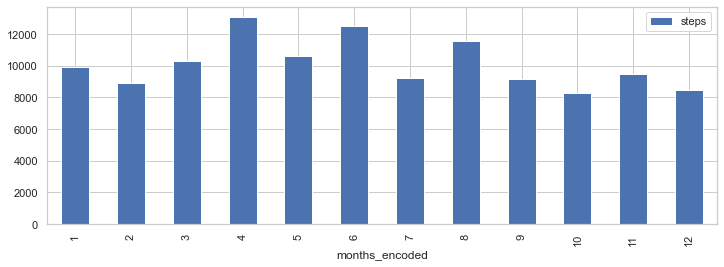

In [233]:
plot1 = ft.groupby("months_encoded").agg({"steps":"mean"})
plot1.plot(kind="bar")



In [97]:
plot1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Steps   12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [256]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here

#look for working days and weekends. 0 and 1s



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [257]:
# your code here


In [252]:
lightly_active,very_active,sedentary,steps = [l for l in ft.minutes_lightly_active],[v for v in ft.minutes_very_active], [s for s in ft.minutes_sedentary],[d for d in ft.steps]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


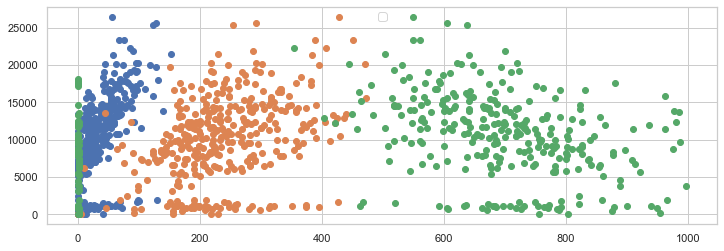

In [260]:
plt.scatter(very_active,steps)
plt.scatter(lightly_active,steps)
plt.scatter(sedentary,steps)
plt.legend( loc='upper center', ncol=3)

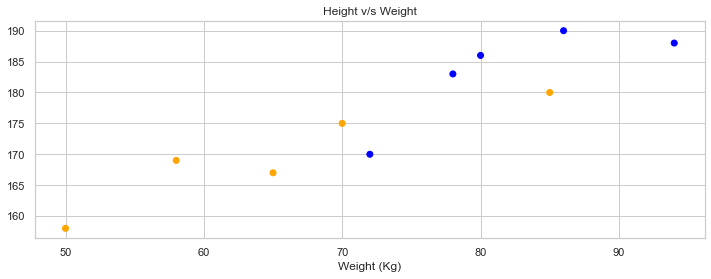

In [249]:
# height, weight and country data
height = [167, 175, 170, 186, 190, 188, 158, 169, 183, 180]
weight = [65, 70, 72, 80, 86, 94, 50, 58, 78, 85]
country = ['A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'A']

# color map for each category
colors = {'A':'orange', 'B':'blue'}
color_ls = [colors[i] for i in country]

# plot
plt.scatter(weight, height, c=color_ls)
plt.xlabel("Weight (Kg)")
plt.title("Height v/s Weight")
plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [261]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [277]:
# your code here
titanic.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1028,1029,NaN,2,"Schmidt, Mr. August",male,26.0,0,0,248659,13.0,U0,S


In [263]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [273]:
# NUMERICAL VARIABLES
# your code here
titanic._get_numeric_data().head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [274]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include="object").head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [278]:
# your code here
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['figure.figsize'] = [12.0, 6.0]

#### Use the right visulalization to show the distribution of column `Age`.

In [291]:
# your code here
data = titanic["Age"].value_counts()
data



24.000000    47
22.000000    43
21.000000    41
30.000000    40
18.000000    39
             ..
45.701220     1
23.095064     1
23.926502     1
41.993167     1
38.500000     1
Name: Age, Length: 193, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

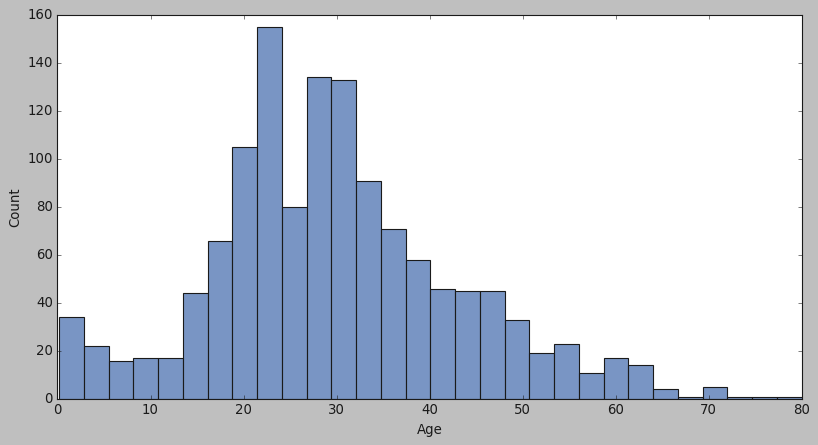

In [293]:
sns.histplot(data=titanic, x= "Age")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

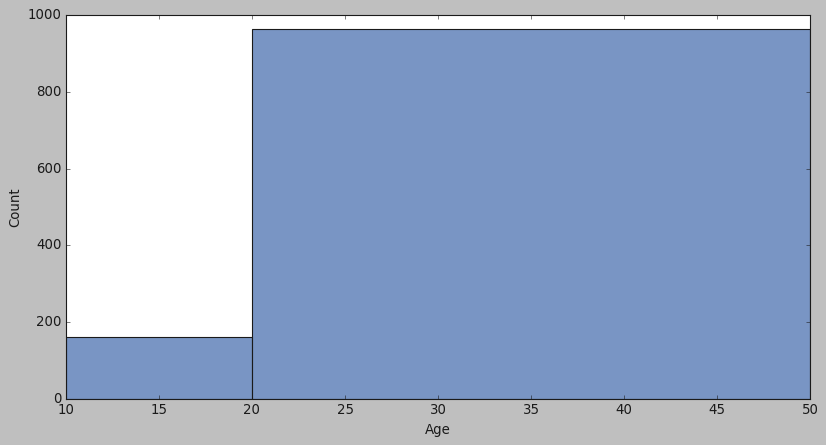

In [295]:
# your code here
bn = [10,20,50]
sns.histplot(data=titanic, x= "Age", bins=bn)

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""
#It affects to the clear visualization of the data.

#### Use seaborn to show the distribution of column `Age`.

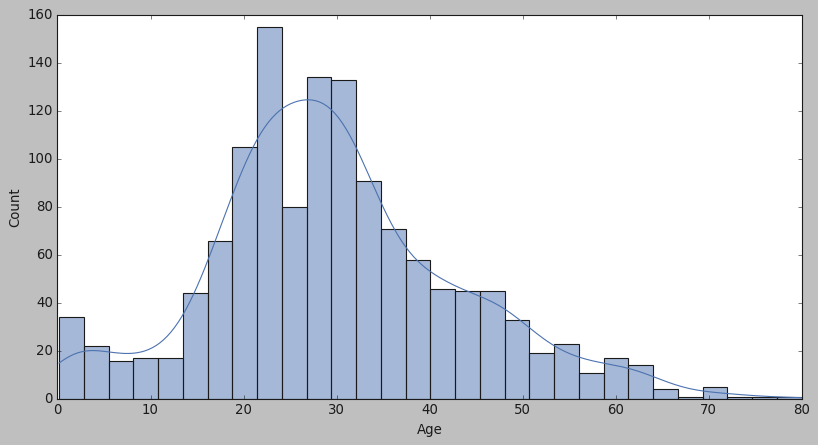

In [296]:
# your code here
sns.histplot(x=titanic.Age, bins=30,kde=True);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here


In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here